# U1 - Abdullah Barhoum (5041774) und Katharina Müller (5284090)

# Assignment 1: Color Spaces, Morphological Operators

## Exercise 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put some example images in in /images.

Rough sketch:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



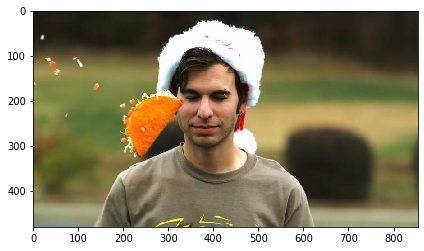

In [1]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
from tqdm import tqdm

image = io.imread('images/taco.jpg')
io.imshow(image)

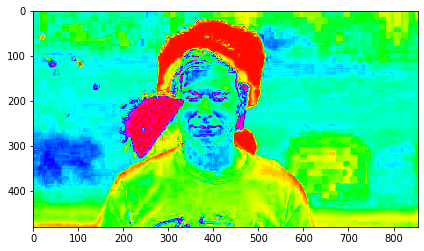

In [2]:
io.imshow(color.rgb2hsv(image)[:, :, 1], cmap='hsv')
# color.rgb2hsv(image)[:, :, 0]

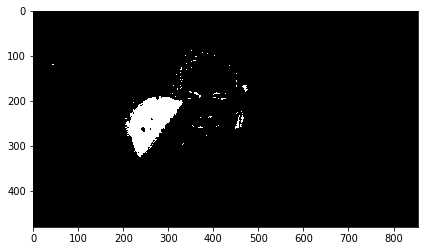

In [3]:
img = color.rgb2hsv(image).reshape(-1, 3)

new_img = np.zeros(480 * 854)
for i, (h, s, v) in enumerate(img):
    h2 = h * 360
    if h2 < 50 and s > 0.85:
        new_img[i] = 1

new_img = new_img.reshape(480, 854)
io.imshow(new_img, cmap='binary_r')

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

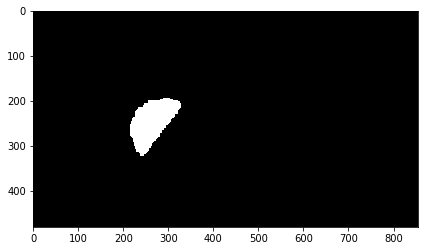

In [4]:
kernel = np.ones((10, 10))
temp  = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel)
temp = cv2.morphologyEx(temp, cv2.MORPH_CLOSE, kernel)
io.imshow(temp)

In [5]:
minx, maxx, miny, maxy = float('inf'), 0, float('inf'), 0
for y, row in enumerate(temp):
    for x, b in enumerate(row):
        if b == 0:
            continue
        if x < minx:
            minx = x
        if x > maxx:
            maxx = x
        if y < miny:
            miny = y
        if y > maxy:
            maxy = y
            

In [6]:
def write_bounding_box(img, minx, maxx, miny, maxy):
    return 

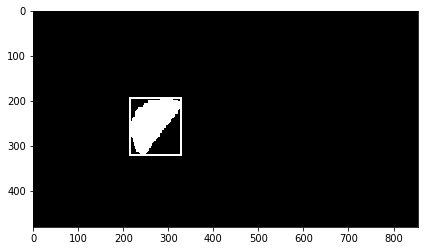

In [7]:
io.imshow(cv2.rectangle(temp, (minx, miny), (maxx, maxy), 1, 3))

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

In [8]:
# everything above in one function
def get_taco_bounding_box(image):
    HEIGHT, WIDTH, CHANNELS = image.shape
    hsv = color.rgb2hsv(image)
    binary = np.zeros(WIDTH * HEIGHT)
    for i, (h, s, v) in enumerate(hsv.reshape(-1, CHANNELS)):
        h2 = h * 360
        if h2 < 50 and s > 0.85:
            binary[i] = 1

    binary = binary.reshape(HEIGHT, WIDTH)
    kernel = np.ones((10, 10))
    binary  = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    minx, maxx, miny, maxy = float('inf'), 0, float('inf'), 0
    for y, row in enumerate(binary):
        for x, b in enumerate(row):
            if b == 0:
                continue
            if x < minx:
                minx = x
            elif x > maxx:
                maxx = x
            if y < miny:
                miny = y
            elif y > maxy:
                maxy = y

    return minx, maxx, miny, maxy

In [9]:
center_color = (0, 50, 250)
box_color = (0, 250, 250)
points = []
for i, image_path in enumerate(tqdm(glob.glob('./images/taco/*.jpg'))):
    img = io.imread(image_path)
    points.append(get_taco_bounding_box(img))
    
    for  minx, maxx, miny, maxy in points:
        center = (int((minx + maxx) / 2), int((miny + maxy) / 2))
        cv2.circle(img, center, 5, center_color, -1)
    cv2.rectangle(img, (minx, miny), (maxx, maxy), box_color, 3)
    io.imsave('./output/' + str(i) +'.jpg', img)

100%|█████████████████████████████████████████| 222/222 [05:52<00:00,  1.59s/it]


I took all the pictures and created a GIF!


![taco](./gifs/taco2.gif)